# **21/04838 FESTUS MAITHYA**:👋

**MACHINE LEARNING**

**CAT 1**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Acquisition and Preprocessing
csv_file = "/content/SafaricomAllStocks.csv"

try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: File '{csv_file}' not found. Make sure the CSV file path is correct.")
    exit()

In [4]:
# Print the first few rows to inspect the data format
print(df.head())

       Date   Open   High   Low   Close    Volume
0  02/11/25  17.90  18.00  17.5   17.75   9072400
1  02/10/25  17.80  18.00  17.7   17.90   1848700
2  02/07/25  18.25  18.25  17.8   17.95   9991800
3  02/06/25  18.25  18.50  18.0   18.15  11395300
4  02/05/25  18.00  18.80  18.0   18.45  15718800


In [8]:
# Renaming columns to be consistent and easier to work with during programming the algorithms
df = df.rename(columns={
    " Date": "Date",
    " Open": "Open",
    " High": "High",
    " Low": "Low",
    " Close": "Close",
    " Volume": "Volume"
})

In [10]:
print(df.head())

       Date   Open   High   Low  Close    Volume
0  02/11/25  17.90  18.00  17.5  17.75   9072400
1  02/10/25  17.80  18.00  17.7  17.90   1848700
2  02/07/25  18.25  18.25  17.8  17.95   9991800
3  02/06/25  18.25  18.50  18.0  18.15  11395300
4  02/05/25  18.00  18.80  18.0  18.45  15718800


In [ ]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df = df.set_index('Date')

# Sort the data by date (earliest to latest) - this is important for time series analysis
df = df.sort_index()

In [13]:
# Check for missing values before cleaning the dataset
print("\nMissing values before cleaning:\n", df.isnull().sum())



Missing values before cleaning:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


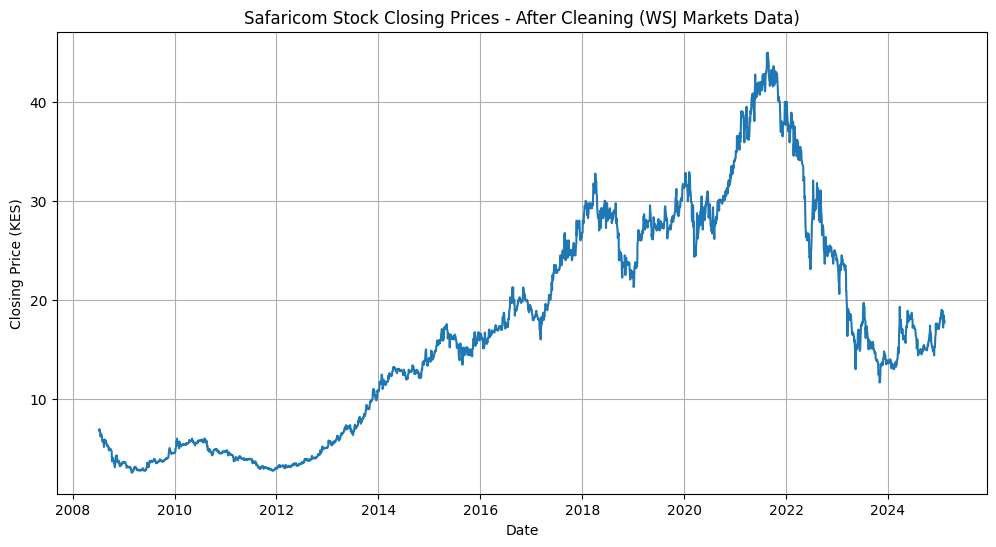

In [16]:
# Let's visualize the cleaned closing price since there are no missing values in the dataset
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Safaricom Stock Closing Prices - After Cleaning (WSJ Markets Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price (KES)')
plt.grid(True)
plt.show()

Data Distribution Visualization after cleaning the dataset

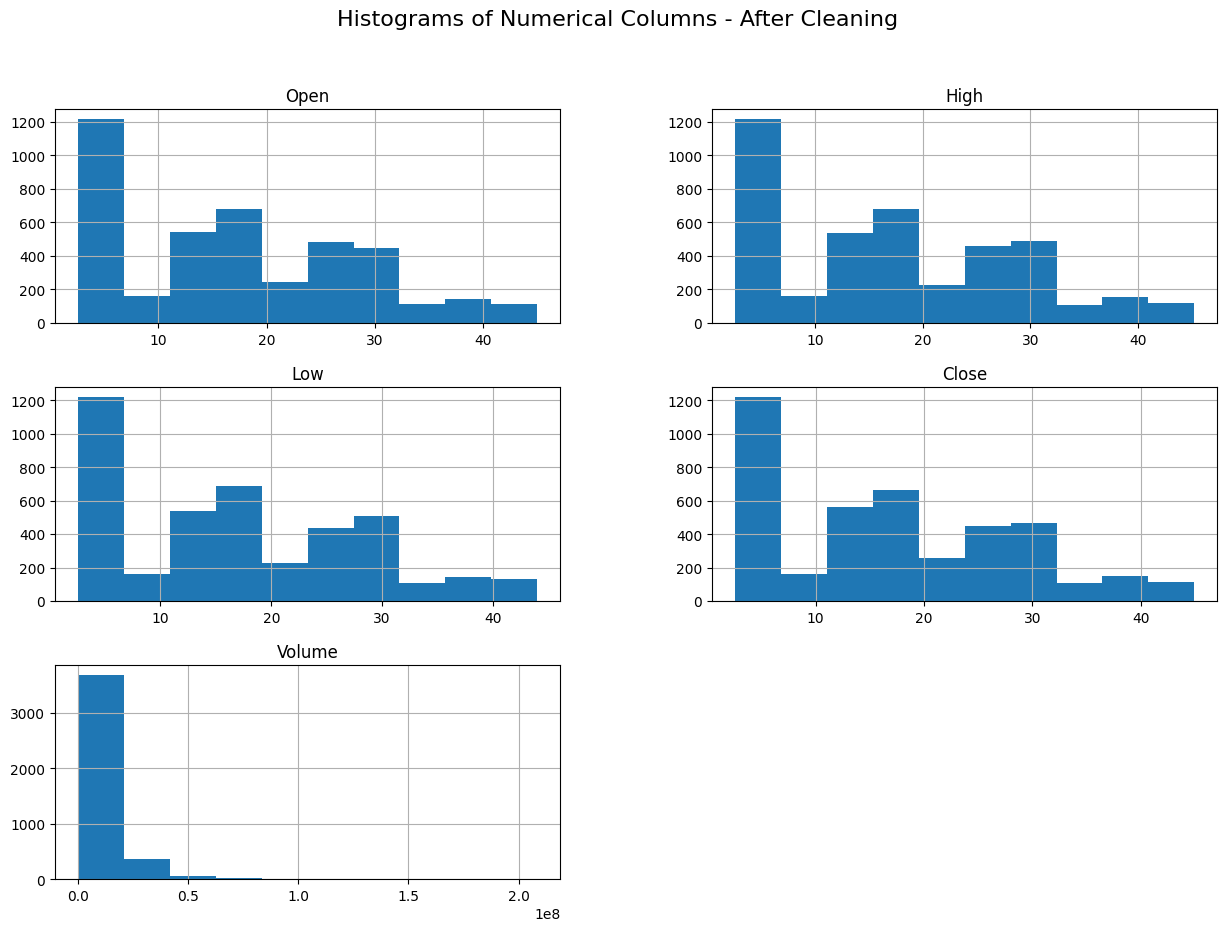

In [17]:
# Plotting histograms for numerical columns to understand their distribution
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns - After Cleaning", fontsize=16)
plt.show()

Box plots to identify outliers

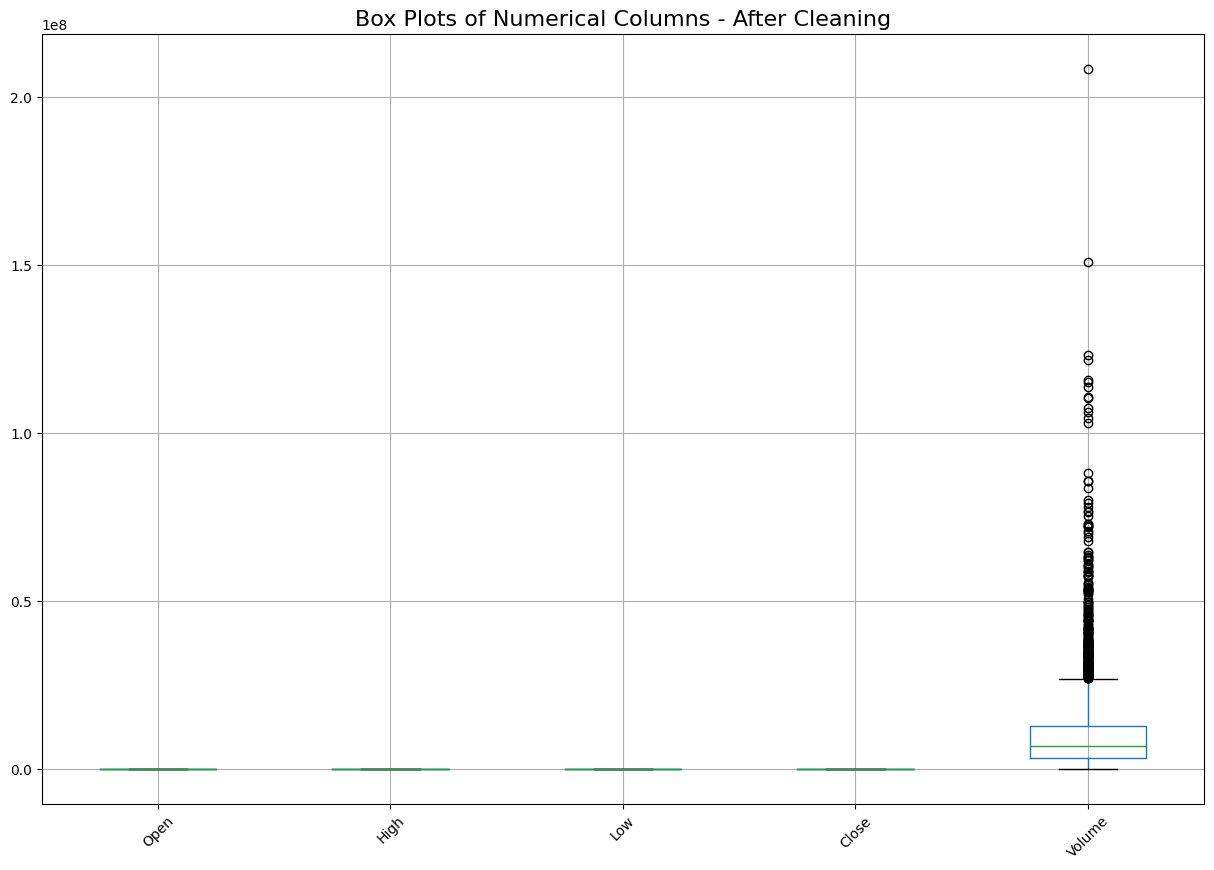

In [18]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Box Plots of Numerical Columns - After Cleaning", fontsize=16)
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

**RSI (Relative Strength Index)** is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. It oscillates between 0 and 100, with readings above 70 generally considered overbought and readings below 30 generally considered oversold.

**MACD (Moving Average Convergence Divergence)** is a trend-following momentum indicator that shows the relationship between two moving averages of prices. It typically involves a fast and a slow exponential moving average (EMA) of the closing price.

**OBV (On-Balance Volume)** is a momentum indicator that uses volume flow to predict changes in stock price. It is based on the principle that volume precedes price. OBV rises when volume on up days is higher than volume on down days, and falls when the opposite is true.

In [33]:
def calculate_moving_averages(df, windows=[5, 20, 50]):
    for window in windows:
        df[f'MA_{window}'] = df['Close'].rolling(window=window).mean()
    return df

def calculate_rsi(df, period=14):
    delta = df[' Close'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=period).mean()
    avg_loss = abs(down.rolling(window=period).mean())

    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    df['RSI'] = rsi
    return df

def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    ema_fast = df['Close'].ewm(span=fast_period, adjust=False).mean()
    ema_slow = df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    df['MACD'] = signal
    df['Signal'] = signal
    return df

def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df[' Close'][i] > df[' Close'][i-1]:
            obv.append(obv[-1] + df[' Volume'][i])
        elif df[' Close'][i] < df[' Close'][i-1]:
            obv.append(obv[-1] - df[' Volume'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

def create_lagged_prices(df, lags=3):
    for i in range(1, lags + 1):
        df[f'Lag_{i}'] = df[' Close'].shift(i)
    return df

In [28]:
# Drop rows with NaN values created by feature engineering
df = df.dropna()

In [29]:
# Display the first few rows with the new features
print("First few rows with engineered features:\n", df.head())

First few rows with engineered features:
             Open  High   Low  Close    Volume
Date                                         
2008-07-09  6.90  6.80  6.80   6.80  33552699
2008-07-10  6.80  6.95  6.95   6.95  64655809
2008-07-11  6.80  6.90  6.90   6.90  21277000
2008-07-14  6.90  6.85  6.85   6.85  17917100
2008-07-15  6.85  6.70  6.70   6.70  29324000


**Correlation matrix of the features**

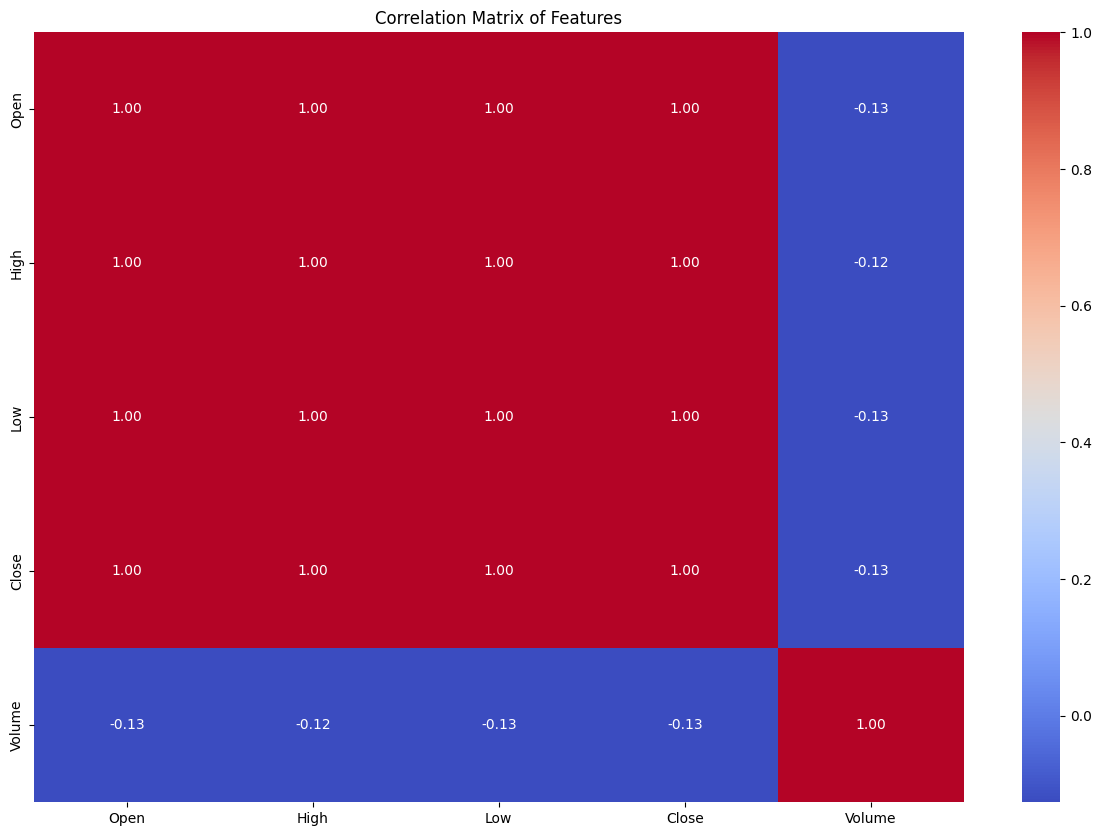

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [35]:
# Plotting a few of the engineered features
plt.figure(figsize=(15, 10))
plt.plot(df['MA_5'], label='5-Day Moving Average')
plt.plot(df['MA_20'], label='20-Day Moving Average')
plt.plot(df['RSI'], label='Relative Strength Index')
plt.title('Engineered Features')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

KeyError: 'MA_5'

<Figure size 1500x1000 with 0 Axes>